In [49]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import pdb
from sklearn.metrics import classification_report,auc

In [2]:
#Read data
inputfile="framingham.csv"
df=pd.read_csv(inputfile)
df.shape

(4240, 16)

In [3]:
#Inspect data
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
#Two Step Process to Create Age `dummy` column - First round age to nearest "decile" (base = 10) and then call `get_dummies()` function

def custom_round(x, base):
    return int(base * round(float(x)/base))


#Create `deciles` of Age. (Feature Engineering)
df['age_round'] = df['age'].apply(lambda x: custom_round(x,base=10))
df = pd.get_dummies(df,columns=['age_round','male'])
df.head()

,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,...,heartRate,glucose,TenYearCHD,age_round_30,age_round_40,age_round_50,age_round_60,age_round_70,male_0,male_1
0,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,...,80.0,77.0,0,0,1,0,0,0,0,1
1,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,...,95.0,76.0,0,0,0,1,0,0,1,0
2,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,...,75.0,70.0,0,0,0,1,0,0,0,1
3,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,...,65.0,103.0,1,0,0,0,1,0,1,0
4,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,...,85.0,85.0,0,0,0,1,0,0,1,0


In [5]:
#Inspect Null Values
df[df.isnull().any(axis=1)]

,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,...,heartRate,glucose,TenYearCHD,age_round_30,age_round_40,age_round_50,age_round_60,age_round_70,male_0,male_1
14,39,2.0,1,9.0,0.0,0,0,0,226.0,114.0,...,85.0,NaN,0,0,1,0,0,0,1,0
21,43,1.0,0,0.0,0.0,0,0,0,185.0,123.5,...,70.0,NaN,0,0,1,0,0,0,1,0
26,60,1.0,0,0.0,0.0,0,0,0,260.0,110.0,...,65.0,NaN,0,0,0,0,1,0,1,0
33,61,NaN,1,5.0,0.0,0,0,0,175.0,134.0,...,72.0,75.0,1,0,0,0,1,0,0,1
36,56,NaN,0,0.0,0.0,0,0,0,257.0,153.5,...,72.0,75.0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4208,51,1.0,1,9.0,0.0,0,0,0,340.0,152.0,...,70.0,NaN,0,0,0,1,0,0,1,0
4229,51,3.0,1,20.0,0.0,0,1,0,251.0,140.0,...,75.0,NaN,0,0,0,1,0,0,1,0
4230,56,1.0,1,3.0,0.0,0,1,0,268.0,170.0,...,57.0,NaN,0,0,0,0,1,0,1,0
4235,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,...,84.0,86.0,0,0,0,1,0,0,1,0


In [6]:
#check shape of DF
df.shape

(4240, 22)

In [7]:
df.isna().sum(axis=0)
tmp = df.drop(['education','glucose'],axis=1).isna().sum(axis=0)
df.drop
df.drop(['education','glucose'],axis=1).isna().sum(axis=0)

age                 0
currentSmoker       0
cigsPerDay         29
BPMeds             53
prevalentStroke     0
prevalentHyp        0
diabetes            0
totChol            50
sysBP               0
diaBP               0
BMI                19
heartRate           1
TenYearCHD          0
age_round_30        0
age_round_40        0
age_round_50        0
age_round_60        0
age_round_70        0
male_0              0
male_1              0
dtype: int64

In [8]:
df[(df['currentSmoker']==1)&(df['cigsPerDay'].isna())]

#Imputation (Since CigsPerDay==1, we know they are smokers), we just don't know how much, in this case, we can plug in , mean-cigs per day
df[(df['currentSmoker']==1)&(df['cigsPerDay'].isna())]

,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,...,heartRate,glucose,TenYearCHD,age_round_30,age_round_40,age_round_50,age_round_60,age_round_70,male_0,male_1
131,43,4.0,1,NaN,0.0,0,0,0,222.0,109.5,...,75.0,NaN,0,0,1,0,0,0,0,1
139,49,4.0,1,NaN,0.0,0,0,0,256.0,127.5,...,93.0,85.0,1,0,0,1,0,0,0,1
1046,49,1.0,1,NaN,0.0,0,0,0,280.0,120.0,...,90.0,75.0,0,0,0,1,0,0,1,0
1292,42,3.0,1,NaN,0.0,0,0,0,225.0,122.5,...,90.0,90.0,0,0,1,0,0,0,0,1
1347,58,4.0,1,NaN,0.0,0,1,0,270.0,195.0,...,75.0,NaN,0,0,0,0,1,0,1,0
1451,54,1.0,1,NaN,0.0,0,0,0,219.0,110.0,...,95.0,86.0,0,0,0,1,0,0,0,1
1497,55,1.0,1,NaN,0.0,0,0,0,214.0,132.5,...,70.0,103.0,0,0,0,0,1,0,0,1
1610,61,1.0,1,NaN,0.0,0,1,0,356.0,168.0,...,103.0,106.0,0,0,0,0,1,0,1,0
1625,49,2.0,1,NaN,0.0,0,1,0,233.0,158.0,...,90.0,72.0,0,0,0,1,0,0,1,0
1870,47,2.0,1,NaN,0.0,0,0,0,365.0,127.0,...,72.0,80.0,0,0,0,1,0,0,1,0


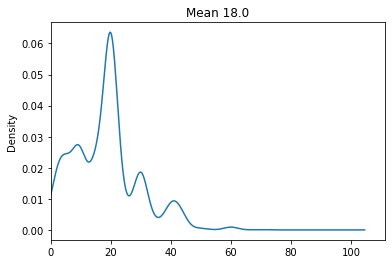

In [9]:
#Imputation for CigsPer Day (just add mean value of cigsPerDay)
cigs_per_day=df[(df['currentSmoker']==1)&(~df['cigsPerDay'].isna())]['cigsPerDay'].mean()
df[(df['currentSmoker']==1)&(~df['cigsPerDay'].isna())]['cigsPerDay'].plot(kind='kde',xlim=0,title="Mean {}".format(round(cigs_per_day,0)))

cigsperday_nan_idxs=df[(df['currentSmoker']==1)&(df['cigsPerDay'].isna())].index.values.ravel()
df.loc[cigsperday_nan_idxs,'cigsPerDay'] = round(cigs_per_day,0)

In [10]:
#No more NaN values for CigsPerDay
df[(df['currentSmoker']==1)&(df['cigsPerDay'].isna())]

,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,...,heartRate,glucose,TenYearCHD,age_round_30,age_round_40,age_round_50,age_round_60,age_round_70,male_0,male_1


In [11]:
#Check if values have been properly imputed

df.loc[cigsperday_nan_idxs,'cigsPerDay']

131     18.0
139     18.0
1046    18.0
1292    18.0
1347    18.0
1451    18.0
1497    18.0
1610    18.0
1625    18.0
1870    18.0
1963    18.0
1980    18.0
2405    18.0
2513    18.0
2542    18.0
3021    18.0
3034    18.0
3094    18.0
3106    18.0
3108    18.0
3156    18.0
3177    18.0
3309    18.0
3432    18.0
3579    18.0
3715    18.0
3847    18.0
3924    18.0
3942    18.0
Name: cigsPerDay, dtype: float64

In [12]:
# Check if other values are unaffected by imputation (sanity check)
df[(df['currentSmoker']==1)]

,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,...,heartRate,glucose,TenYearCHD,age_round_30,age_round_40,age_round_50,age_round_60,age_round_70,male_0,male_1
2,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,...,75.0,70.0,0,0,0,1,0,0,0,1
3,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,...,65.0,103.0,1,0,0,0,1,0,1,0
4,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,...,85.0,85.0,0,0,0,1,0,0,1,0
7,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,...,79.0,78.0,0,0,1,0,0,0,1,0
9,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,...,93.0,88.0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,...,66.0,86.0,1,0,0,1,0,0,0,1
4234,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,...,65.0,68.0,0,0,0,1,0,0,0,1
4235,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,...,84.0,86.0,0,0,0,1,0,0,1,0
4236,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,...,86.0,NaN,0,0,1,0,0,0,1,0


In [13]:
df.isna().sum(axis=0)

age                  0
education          105
currentSmoker        0
cigsPerDay           0
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
age_round_30         0
age_round_40         0
age_round_50         0
age_round_60         0
age_round_70         0
male_0               0
male_1               0
dtype: int64

In [14]:
df.drop(['education','glucose'],axis=1).isna().sum(axis=0)

age                 0
currentSmoker       0
cigsPerDay          0
BPMeds             53
prevalentStroke     0
prevalentHyp        0
diabetes            0
totChol            50
sysBP               0
diaBP               0
BMI                19
heartRate           1
TenYearCHD          0
age_round_30        0
age_round_40        0
age_round_50        0
age_round_60        0
age_round_70        0
male_0              0
male_1              0
dtype: int64

In [15]:
df = df.drop(['education','glucose'],axis=1).dropna(how='any') #Drop these 2 columns

In [16]:
df.isnull().sum(axis=0) #No NaN columns

age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
TenYearCHD         0
age_round_30       0
age_round_40       0
age_round_50       0
age_round_60       0
age_round_70       0
male_0             0
male_1             0
dtype: int64

# Feature , Target Split, Train, Test Split

In [17]:
TARGET_COL='TenYearCHD'

feat=df.drop(['age',TARGET_COL],axis=1)
tgt=df[TARGET_COL]
print(feat.shape,tgt.shape)

(4119, 18) (4119,)


In [18]:
#Split Data
trainX,testX,trainY,testY=train_test_split(feat,tgt,test_size=0.2, random_state=42)

In [19]:
trainX.head()

,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,age_round_30,age_round_40,age_round_50,age_round_60,age_round_70,male_0,male_1
334,1,20.0,0.0,0,1,0,220.0,145.0,99.0,26.50,73.0,0,1,0,0,0,0,1
2430,1,20.0,0.0,0,0,0,212.0,138.5,87.5,19.54,64.0,0,0,0,1,0,0,1
1432,0,0.0,0.0,0,0,0,239.0,127.5,77.5,26.65,70.0,0,0,1,0,0,1,0
481,0,0.0,0.0,0,1,0,253.0,295.0,135.0,38.82,92.0,0,0,0,1,0,1,0
575,1,43.0,0.0,0,0,0,215.0,122.0,76.0,26.84,85.0,0,1,0,0,0,0,1


In [20]:
for col in trainX.columns:
    print("\n\n",col,trainX[col].unique())



 currentSmoker [1 0]


 cigsPerDay [20.  0. 43. 30. 40.  9.  3. 19. 17. 15.  2.  5. 10. 50.  7.  1. 18. 25.
 60. 12. 16.  6.  4. 35. 14. 38.  8. 23. 45. 13. 29. 70. 11.]


 BPMeds [0. 1.]


 prevalentStroke [0 1]


 prevalentHyp [1 0]


 diabetes [0 1]


 totChol [220. 212. 239. 253. 215. 224. 260. 126. 193. 158. 258. 184. 235. 204.
 231. 285. 219. 211. 170. 225. 280. 264. 186. 302. 165. 172. 275. 254.
 270. 298. 256. 252. 185. 226. 213. 250. 266. 192. 321. 232. 200. 296.
 217. 255. 195. 230. 183. 323. 208. 155. 162. 279. 272. 210. 240. 304.
 216. 223. 194. 261. 234. 169. 246. 241. 207. 198. 257. 222. 191. 202.
 228. 203. 320. 262. 273. 282. 227. 201. 205. 221. 245. 237. 176. 229.
 311. 209. 189. 259. 287. 242. 300. 289. 188. 286. 173. 159. 175. 218.
 271. 305. 199. 180. 182. 149. 190. 295. 238. 251. 214. 340. 181. 243.
 265. 167. 325. 291. 313. 281. 314. 278. 206. 310. 297. 196. 308. 341.
 177. 309. 247. 197. 290. 288. 161. 301. 293. 292. 249. 166. 322. 274.
 187. 263. 248. 267. 317

In [21]:
trainY.unique() #No scaling needed

array([0, 1])

In [22]:
scale_cols=['cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate']

scaler=MinMaxScaler() #Why this choice?
trainX[scale_cols] = scaler.fit_transform(trainX[scale_cols].values) 
testX[scale_cols] = scaler.transform(testX[scale_cols].values)
trainX.shape,testX.shape

/Users/nik90/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
/Users/nik90/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


((3295, 18), (824, 18))

In [29]:
clf=LogisticRegression()
clf.fit(trainX,trainY)
preds = clf.predict(testX)
preds_proba = clf.predict_proba(testX)

print(classification_report(testY.ravel(),preds.ravel(),target_names=['NoCHD','TenYearCHD']))

              precision    recall  f1-score   support

       NoCHD       0.84      0.99      0.91       691
  TenYearCHD       0.43      0.02      0.04       133

    accuracy                           0.84       824
   macro avg       0.63      0.51      0.48       824
weighted avg       0.77      0.84      0.77       824



In [30]:
def map_prob_to_label(preds,thr):
    """
       Assume preds = n x 2 (ie., 2 class classification)
    """
    pred_labels=np.zeros(preds.shape[0]) #initially, all labels predict no TenYearCHD
    pred_labels[np.argwhere(preds[:,1]>thr)] = 1 #for all instances in the predictions where the predicted probability of TenYearCHD is greater than `thr` , classify as True
    
    return pred_labels

In [31]:
pred_labels=map_prob_to_label(preds_proba,thr=0.1)
print(classification_report(testY.ravel(),pred_labels,target_names=['NoCHD','TenYearCHD']))

              precision    recall  f1-score   support

       NoCHD       0.93      0.49      0.64       691
  TenYearCHD       0.23      0.80      0.36       133

    accuracy                           0.54       824
   macro avg       0.58      0.65      0.50       824
weighted avg       0.82      0.54      0.59       824



In [46]:
import numpy as np

def roc_curve(y_true, y_prob, thresholds):

    fpr = []
    tpr = []
    
    print("Inspected Thresholds\n\n {}\n\n ".format(thresholds))
    for threshold in thresholds:

        y_pred = map_prob_to_label(y_prob,threshold)

        fp = np.sum((y_pred == 1) & (y_true == 0))
        tp = np.sum((y_pred == 1) & (y_true == 1))

        fn = np.sum((y_pred == 0) & (y_true == 1))
        tn = np.sum((y_pred == 0) & (y_true == 0))

        fpr.append(fp / (fp + tn))
        tpr.append(tp / (tp + fn))

    return (fpr, tpr)

Inspected Thresholds

 [0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99 1.  ]

 


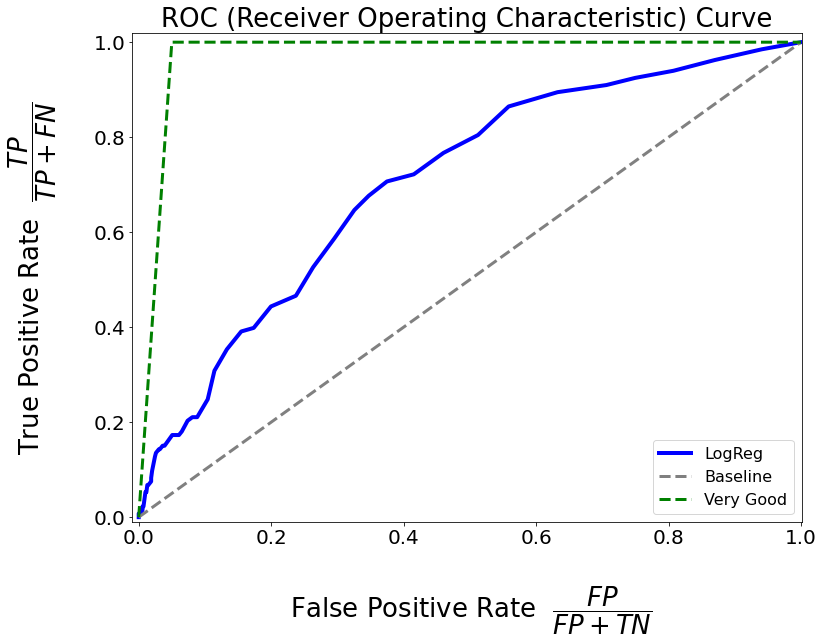

In [93]:
fpr,tpr = roc_curve(testY.ravel(),preds_proba,np.arange(0.0,1.001,0.01))

#For Our Toy Perfect Model (i.e., we create fake TPR, FPR values to show a curve)
good_fpr=np.arange(0,1.01,0.01)
good_tpr=[0]+np.arange(0.2,1,0.2).tolist()
good_tpr+=[1.0]*(good_fpr.shape[0]-len(good_tpr))

fig,ax=plt.subplots(1,1,figsize=(12,9))
ax.plot(fpr,tpr,c='blue',lw=4)
ax.plot(np.arange(0,1,0.001),np.arange(0,1,0.001),c='gray',linestyle='--',lw=3)
ax.plot(good_fpr,good_tpr,c='green',linestyle='--',lw=3)
ax.set_xlabel("\n False Positive Rate $\,\,\dfrac{FP}{FP + TN}$",fontsize=26)
ax.set_ylabel("True Positive Rate $\,\,\dfrac{TP}{TP + FN}$\n",fontsize=26)
ax.set_title("ROC (Receiver Operating Characteristic) Curve",fontsize=26)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.set_xlim([-0.01,1.001])
_=ax.set_ylim([-0.01,1.02])
ax.legend(['LogReg','Baseline','Very Good'],fontsize=16)

In [57]:
_auc=auc(fpr, tpr)
print("Area Under the ROC Curve {}".format(round(_auc,4)))

Area Under the ROC Curve 0.7059


In [62]:
_auc=auc(np.arange(0,1.01,0.01),np.arange(0,1.01,0.01))
print("Area Under ROC Curve for Baseline {}".format(round(_auc,4)))

Area Under ROC Curve for Baseline 0.5


In [94]:
_auc=auc(good_fpr,good_tpr)
print("Area Under ROC Curve for Perfect Model {}".format(round(_auc,4)))

Area Under ROC Curve for Perfect Model 0.975
